## Ejercicio: **Transfer Learning y Fine Tuning**


### Ejercicio 0

In [2]:
!pip install opencv-python-headless


   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
   - -------------------------------------- 1.0/38.9 MB 5.6 MB/s eta 0:00:07
   -- ------------------------------------- 2.4/38.9 MB 5.6 MB/s eta 0:00:07
   --- ------------------------------------ 3.1/38.9 MB 5.6 MB/s eta 0:00:07
   ---- ----------------------------------- 4.2/38.9 MB 5.2 MB/s eta 0:00:07
   ----- ---------------------------------- 5.5/38.9 MB 5.2 MB/s eta 0:00:07
   ------ --------------------------------- 6.6/38.9 MB 5.2 MB/s eta 0:00:07
   -------- ------------------------------- 7.9/38.9 MB 5.3 MB/s eta 0:00:06
   --------- ------------------------------ 8.9/38.9 MB 5.3 MB/s eta 0:00:06
   ---------- ----------------------------- 10.2/38.9 MB 5.3 MB/s eta 0:00:06
   ----------- ---------------------------- 11.3/38.9 MB 5.3 MB/s eta 0:00:06
   ------------ --------------------------- 12.6/38.9 MB 5.4 MB/s eta 0:00:05
   -------------- ------------------------- 13.6/38.9 MB 5.4 MB/s eta 0:00:05
  

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns


from skimage.io import imread
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


### Objetivo del ejercicio

Comparar una red convolucional hecha ad-hoc frente a los modelos preentrenados y ajustados con fine tuning y transfer learning. Para ello emplea el dataset de paisajes del conjunto de ejercicios de la unidad anterior.


### Se pide

1. Preparar los datos del modelo y las funciones de visualización, copia para ello todo lo que necesites de las soluciones del ejercicio de clasificación de paisajes de la unidad anterior.

2. Escoger entre uno de los modelos VGG-19, InceptionV3 y MobileNetV2 (todos en https://keras.io/api/applications/) (Se aconseja este último si no tenemos un ordenador muy potente). Si no te haces con estos puedes recurrir a la ResNetV50.

4. Hacer un transfer-learning con una cabeza de como mucho 2 capas densas ocultas y una de salida. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

5. Hacer un fine-tuning con la misma cabeza diseñada en el punto anterior. Mostrar la evaluación contra test, el report de clasificación y la matriz de confusión.

6. Comparar los resultados con los obtenidos con la red convolucional del ejercicio mencionado.

EXTRA:
- Repetir el transfer learning empleando aumentado de imágenes.



### Funciones y preparación de datos 

In [3]:
keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="xception",
)

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step


<Functional name=xception, built=True>

In [ ]:
mkdir data

In [ ]:
mv PROF_seg_train.zip ./data/

"mv" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [ ]:
mv PROF_seg_test.zip ./data

"mv" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [7]:
!unzip ./data/PROF_seg_train.zip -d ./data/

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: ./data/seg_train/mountain/7539.jpg  
  inflating: ./data/seg_train/mountain/7551.jpg  
  inflating: ./data/seg_train/mountain/7560.jpg  
  inflating: ./data/seg_train/mountain/7565.jpg  
  inflating: ./data/seg_train/mountain/7578.jpg  
  inflating: ./data/seg_train/mountain/7581.jpg  
  inflating: ./data/seg_train/mountain/7586.jpg  
  inflating: ./data/seg_train/mountain/7647.jpg  
  inflating: ./data/seg_train/mountain/7652.jpg  
  inflating: ./data/seg_train/mountain/7654.jpg  
  inflating: ./data/seg_train/mountain/7662.jpg  
  inflating: ./data/seg_train/mountain/767.jpg  
  inflating: ./data/seg_train/mountain/7672.jpg  
  inflating: ./data/seg_train/mountain/7679.jpg  
  inflating: ./data/seg_train/mountain/7681.jpg  
  inflating: ./data/seg_train/mountain/7693.jpg  
  inflating: ./data/seg_train/mountain/7695.jpg  
  inflating: ./data/seg_train/mountain/7698.jpg  
  inflating: ./data/seg_train/mountain/7

In [ ]:
unzip ./data/PROF_seg_test.zip -d ./data/

Archive:  ./data/PROF_seg_test.zip
   creating: ./data/seg_test/
   creating: ./data/seg_test/buildings/
  inflating: ./data/seg_test/buildings/20057.jpg  
  inflating: ./data/seg_test/buildings/20060.jpg  
  inflating: ./data/seg_test/buildings/20061.jpg  
  inflating: ./data/seg_test/buildings/20064.jpg  
  inflating: ./data/seg_test/buildings/20073.jpg  
  inflating: ./data/seg_test/buildings/20074.jpg  
  inflating: ./data/seg_test/buildings/20078.jpg  
  inflating: ./data/seg_test/buildings/20083.jpg  
  inflating: ./data/seg_test/buildings/20094.jpg  
  inflating: ./data/seg_test/buildings/20096.jpg  
  inflating: ./data/seg_test/buildings/20113.jpg  
  inflating: ./data/seg_test/buildings/20131.jpg  
  inflating: ./data/seg_test/buildings/20140.jpg  
  inflating: ./data/seg_test/buildings/20177.jpg  
  inflating: ./data/seg_test/buildings/20186.jpg  
  inflating: ./data/seg_test/buildings/20206.jpg  
  inflating: ./data/seg_test/buildings/20207.jpg  
  inflating: ./data/seg_test

In [10]:
!rm data/PROF_seg_train.zip

In [11]:
!rm data/PROF_seg_test.zip

In [ ]:
# !mv ./data/seg_train.zip .

In [ ]:
# !mv ./data/seg_test.zip .

In [ ]:
#!rm data.zip
#!rm -dr data

In [ ]:
### Carga de datos y preparación:
ROOT_PATH = './data/'
TRAIN_PATH = ROOT_PATH + "seg_train/"
TEST_PATH = ROOT_PATH + "seg_test/"


*Introducimos un parametro de control de la resolución, inicialmente a 32, pero que podamos tocar sin cambiar nada del resto del código para poder probar otras resoluciones*

In [13]:
IMG_WIDTH = IMG_HEIGHT = 75 # primero a 32, luego a 75

In [14]:

def read_data(directorio, reshape_dim = (IMG_WIDTH,IMG_HEIGHT)):
    X = []
    y = []
    for folder in os.listdir(directorio):
        print(folder)
        if os.path.isdir('/'.join([directorio, folder])):
            for file in os.listdir('/'.join([directorio, folder])):

                image = imread('/'.join([directorio, folder, file]))
                image = cv2.resize(image, reshape_dim) # Redimensionamos las imágenes a 32x32

                X.append(image)
                y.append(folder)

    return np.array(X),np.array(y)

def show_images_batch(paisajes, names = [], n_cols = 5, size_scale = 2):
    n_rows = ((len(paisajes) - 1) // n_cols + 1)
    plt.figure(figsize=(n_cols * size_scale, n_rows * 1.1*size_scale))
    for index, paisaje in enumerate(paisajes):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(paisaje, cmap = "Greys")
        plt.axis("off")
        if len(names):
            plt.title(names[index])


In [15]:
X_train,y_train = read_data(TRAIN_PATH)
X_test, y_test = read_data(TEST_PATH)

glacier
mountain
street
buildings
sea
forest
glacier
mountain
street
buildings
sea
forest


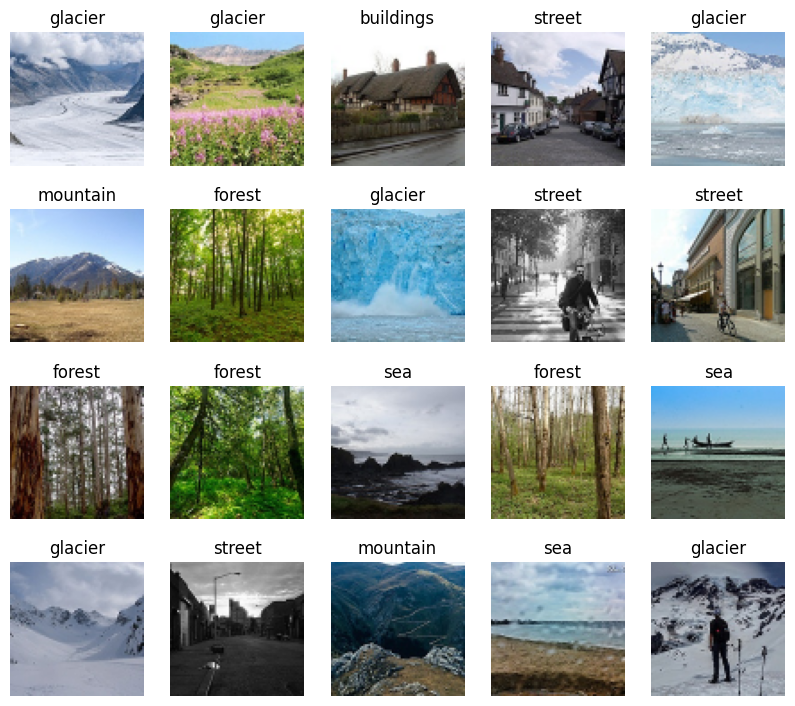

In [16]:
indices = np.random.randint(0,len(X_train),20)
show_images_batch(X_train[indices], names = y_train[indices], n_cols = 5)

In [ ]:

# importa para preprocesar usando inception_v3


In [ ]:
# preprocesado X_train y X_test

### Seleccion del modelo a transferir y tunear


*Escogemos el modelo de [Inception V3](https://arxiv.org/abs/1512.00567) el que tiene las supercapas convolucionales para hacer transfer learning*

In [ ]:
# importa InceptionV3

*Si investigas en la documentación del modelo verás que no puede admite resoluciones de entrada inferiores a 75x75*

### Transfer Learning

*Para el transfer learning vamos a usar una cabeza con una única capa densa con tantas unidades como el aplanamiento de las imagenes, es decir dependiendo de la resolución con la que hayamos cargado las imágenes al principio así tendremos una cantidad u otra de unidades*

In [20]:
X_train.size

236823750

In [21]:
X_train.shape

(14034, 75, 75, 3)

*El train tiene un tamaño más que considerable para aplicar un Adam y eso vamos a hacer, en principio sin tocar nada más*

In [ ]:
IMG_WIDTH = IMG_HEIGHT = 75
# Cargamos el modelo pre-entrenado
# xxx

# Congelamos sus capas
# xxx


# Capa de flatenizado de la salida del modelo base
def prepare_model(base_model = base_model): # Lo creamos así para poder reinicializarlo en cada reentrenamiento en ejercicios posteriores
    x = keras.layers.Flatten()(base_model.output)

    # Tantas unidades como el flatten de la salida de Inception -> 5625 features
    x = keras.layers.Dense(2048, activation='relu')(x)
    x = keras.layers.Dropout(rate = 0.25)(x)

    # Capa final de salida con 6 neuronas (una por clase) y activación softmax
    x = keras.layers.Dense(6, activation='softmax')(x)

    model = keras.Model(base_model.input, x)
    model.compile(optimizer = "adam", loss = 'sparse_categorical_crossentropy', metrics = ['acc']) # sparse -> y es un array de escalares pero hay varias categorias, y un array de vectores
    return model
# Observamos la arquitectura del modelo
model= prepare_model()
model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 37, 37,    │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 37, 37,    │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 37, 37,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 35, 35,    │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 35, 35,    │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 17, 17,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 17, 17,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 17, 17,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 17, 17,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 15, 15,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 15, 15,    │          0 │ batch_normalizat

 Total params: 26,011,430 (99.23 MB)

 Trainable params: 4,208,646 (16.05 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

*Ahora vamos a configurar el resto de hiperparámetros, el batch_size, el número de épocas y el EarlyStopping*

In [23]:
instancias_train = len(X_train)
for i in range(1,5):
    print(f"Batch_size: {32*i}, num_steps_per_epoch: {round(instancias_train/(32*i))}")

Batch_size: 32, num_steps_per_epoch: 439
Batch_size: 64, num_steps_per_epoch: 219
Batch_size: 96, num_steps_per_epoch: 146
Batch_size: 128, num_steps_per_epoch: 110


*Podemos atrevernos hasta con batches de 128, para saber cuál usar vamos a hacer un entrenamiento de una época con cada uno y ver tiempos*

*Antes tendremos que convertir las etiquetas a números*

In [24]:
targets = pd.Series(y_train)

In [25]:
mapa = {tipo:indice for indice,tipo in enumerate(targets.unique())} # Reusando la serie que creamos para ver la distribución del target
mapa

{'glacier': 0,
 'mountain': 1,
 'street': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [26]:
y_train_num = np.array([mapa[y] for y in y_train])
y_test_num = np.array([mapa[y] for y in y_test])

In [27]:
from time import time
for batch_size in [32,64,96,128]:
    t_zero = time()
    model = prepare_model()
    history = model.fit(X_train,
                        y_train_num,
                        batch_size = batch_size,
                        validation_split=0.2,
                        epochs=1,)
    tiempo = round(time() - t_zero, 3)
    print(f"batch_size: {batch_size}, num_steps: {len(X_train)/batch_size}, tiempo 1 epoca: {tiempo}, tiempo 20 épocas: {tiempo * 20}")


351/351 ━━━━━━━━━━━━━━━━━━━━ 179s 483ms/step - acc: 0.6633 - loss: 0.9604 - val_acc: 0.1026 - val_loss: 6.1457
batch_size: 32, num_steps: 438.5625, tiempo 1 epoca: 212.306, tiempo 20 épocas: 4246.12
176/176 ━━━━━━━━━━━━━━━━━━━━ 164s 881ms/step - acc: 0.6459 - loss: 1.0087 - val_acc: 0.1361 - val_loss: 6.9855
batch_size: 64, num_steps: 219.28125, tiempo 1 epoca: 165.481, tiempo 20 épocas: 3309.62
117/117 ━━━━━━━━━━━━━━━━━━━━ 161s 1s/step - acc: 0.6219 - loss: 1.2018 - val_acc: 0.1161 - val_loss: 6.2598
batch_size: 96, num_steps: 146.1875, tiempo 1 epoca: 161.578, tiempo 20 épocas: 3231.56
88/88 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - acc: 0.5830 - loss: 1.3287 - val_acc: 0.1290 - val_loss: 7.4719
batch_size: 128, num_steps: 109.640625, tiempo 1 epoca: 212.503, tiempo 20 épocas: 4250.0599999999995


*Vamos a por los 128 de batch size*

In [28]:
batch_size

128

In [29]:
earlyS = keras.callbacks.EarlyStopping(patience= 10, restore_best_weights= True)

In [30]:
from sklearn.utils import shuffle
X_train_s,y_train_s = shuffle(X_train, y_train_num)

In [31]:
t_zero = time()
model = prepare_model()
history = model.fit(X_train_s,
                    y_train_s,
                    batch_size = batch_size,
                    validation_split=0.2,
                    epochs=40,
                    callbacks = [earlyS])
tiempo = round(time() - t_zero, 3)

Epoch 1/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - acc: 0.6279 - loss: 1.1148 - val_acc: 0.7634 - val_loss: 0.6435
Epoch 2/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - acc: 0.8409 - loss: 0.4559 - val_acc: 0.7706 - val_loss: 0.6307
Epoch 3/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - acc: 0.8779 - loss: 0.3427 - val_acc: 0.7613 - val_loss: 0.6507
Epoch 4/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - acc: 0.9196 - loss: 0.2443 - val_acc: 0.7866 - val_loss: 0.6461
Epoch 5/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - acc: 0.9592 - loss: 0.1443 - val_acc: 0.7866 - val_loss: 0.6615
Epoch 6/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - acc: 0.9845 - loss: 0.0881 - val_acc: 0.7834 - val_loss: 0.7286
Epoch 7/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 186s 1s/step - acc: 0.9917 - loss: 0.0569 - val_acc: 0.7838 - val_loss: 0.7699
Epoch 8/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - acc: 0.9931 - loss: 0.0424 - val_acc: 0.7880 - val_loss: 0.8131
Epoch 9/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - acc: 0.9962

*Evaluamos*

In [32]:
model.evaluate(X_test,y_test_num)

94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 300ms/step - acc: 0.7134 - loss: 0.7364


[0.5900183320045471, 0.784333348274231]

*Un 78% que es un 2% mejor que la convolucional "sencilla", no es mucha ganancia para tanto armatoste. ¿Podríamos mejorar la cabeza decisora?*

*Completemos con el análisis del informe de clasificación y de la matriz de confusión*

In [33]:
y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]

94/94 ━━━━━━━━━━━━━━━━━━━━ 34s 337ms/step


In [34]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
inverse_map = {valor:clave for clave,valor in mapa.items()}
y_test_labels = [inverse_map[y] for y in y_test_num]
y_pred_labels = [inverse_map[y] for y in y_pred]
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

   buildings       0.90      0.71      0.79       437
      forest       0.95      0.93      0.94       474
     glacier       0.77      0.61      0.68       553
    mountain       0.64      0.79      0.71       525
         sea       0.78      0.80      0.79       510
      street       0.76      0.88      0.82       501

    accuracy                           0.78      3000
   macro avg       0.80      0.79      0.79      3000
weighted avg       0.79      0.78      0.78      3000



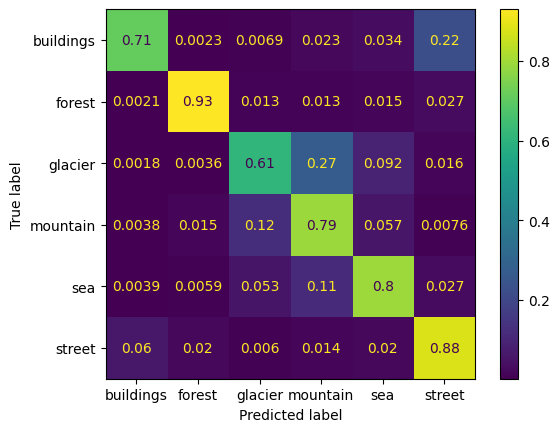

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels, normalize="true")

*Confunde montañas con glaciares y viceversa (las clases peor paradas), aunque las montañas también las confunde con el mar. Es peor en las montañas que el clasificador del ejercicio pero mejor sensiblemente en los edificios y mejor en los glaciares (las dos clases "malas" del clasificador de los ejercicios). Al igual que el clasificador del ejercicio confunde calles con edificios.*

### Fine-Tuning

*Mantenemos la Inception V3*

In [ ]:
#
from keras.applications import InceptionV3
import keras


IMG_WIDTH = IMG_HEIGHT = 75

# Cargamos el modelo pre-entrenado
base_model = InceptionV3(include_top=False, weights=None, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

# Congelamos sus capas
#for layer in base_model.layers:
#    layer.trainable = False


# Capa de flatenizado de la salida del modelo base
def prepare_model(base_model = base_model): # Lo creamos así para poder reinicializarlo en cada reentrenamiento en ejercicios posteriores
    # capa flatten xxx

    # Tantas unidades como el flatten de la salida de Inception
    x = keras.layers.Dense(2048, activation='relu')(x)
    x = keras.layers.Dropout(rate = 0.25)(x)


    # Capa final de salida con 6 neuronas (una por clase) y activación softmax
    # rellenar xxx

    model = keras.Model(base_model.input, x)
    # optimizador adam, métrica accuracy, loss la que debería usarse :-)
    # rellenar
    return model
# Observamos la arquitectura del modelo
model= prepare_model()
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 75, 75, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 37, 37,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 37, 37,    │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 37, 37,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 35, 35,    │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 35, 35,    │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 35, 35,    │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 35, 35,    │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 17, 17,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 17, 17,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 17, 17,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 17, 17,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 15, 15,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 15, 15,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 15, 15,    │          0 │ batch_normalizat

 Total params: 26,011,430 (99.23 MB)

 Trainable params: 25,976,998 (99.09 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [38]:
from time import time
for batch_size in [32,64,96,128]:
    t_zero = time()
    model = prepare_model()
    history = model.fit(X_train_s,
                        y_train_s,
                        batch_size = batch_size,
                        validation_split=0.2,
                        epochs=1,)
    tiempo = round(time() - t_zero, 3)
    print(f"batch_size: {batch_size}, num_steps: {len(X_train)/batch_size}, tiempo 1 epoca: {tiempo}, tiempo 20 épocas: {tiempo * 20}")

351/351 ━━━━━━━━━━━━━━━━━━━━ 746s 2s/step - acc: 0.4467 - loss: 1.8159 - val_acc: 0.2839 - val_loss: 2.1337
batch_size: 32, num_steps: 438.5625, tiempo 1 epoca: 795.128, tiempo 20 épocas: 15902.560000000001
176/176 ━━━━━━━━━━━━━━━━━━━━ 733s 4s/step - acc: 0.4478 - loss: 1.9407 - val_acc: 0.5305 - val_loss: 5.4772
batch_size: 64, num_steps: 219.28125, tiempo 1 epoca: 734.493, tiempo 20 épocas: 14689.86
117/117 ━━━━━━━━━━━━━━━━━━━━ 702s 6s/step - acc: 0.5016 - loss: 1.5189 - val_acc: 0.1557 - val_loss: 2511.4138
batch_size: 96, num_steps: 146.1875, tiempo 1 epoca: 735.211, tiempo 20 épocas: 14704.220000000001
88/88 ━━━━━━━━━━━━━━━━━━━━ 721s 8s/step - acc: 0.5847 - loss: 1.3290 - val_acc: 0.1845 - val_loss: 9864.5986
batch_size: 128, num_steps: 109.640625, tiempo 1 epoca: 735.995, tiempo 20 épocas: 14719.9


*Mantenemos el batch_size en 128*

*Lanzamos el fine-tuning y a esperar*

In [39]:
from time import time
t_zero = time()
model = prepare_model()
history = model.fit(X_train_s,
                    y_train_s,
                    batch_size = batch_size,
                    validation_split=0.2,
                    epochs=40,
                    callbacks = [earlyS])
tiempo = round(time() - t_zero, 3)

Epoch 1/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 716s 8s/step - acc: 0.6228 - loss: 1.2480 - val_acc: 0.3178 - val_loss: 1791.5548
Epoch 2/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 662s 7s/step - acc: 0.7383 - loss: 0.7303 - val_acc: 0.6295 - val_loss: 5.5419
Epoch 3/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 702s 8s/step - acc: 0.7798 - loss: 0.6409 - val_acc: 0.4963 - val_loss: 1.3478
Epoch 4/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 677s 8s/step - acc: 0.7654 - loss: 0.7167 - val_acc: 0.7538 - val_loss: 0.6721
Epoch 5/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 678s 7s/step - acc: 0.8128 - loss: 0.5514 - val_acc: 0.7613 - val_loss: 0.6626
Epoch 6/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 658s 7s/step - acc: 0.8336 - loss: 0.4960 - val_acc: 0.7617 - val_loss: 0.7508
Epoch 7/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 682s 7s/step - acc: 0.8449 - loss: 0.4548 - val_acc: 0.7802 - val_loss: 0.6223
Epoch 8/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 682s 7s/step - acc: 0.8466 - loss: 0.4836 - val_acc: 0.5091 - val_loss: 1.2834
Epoch 9/40
88/88 ━━━━━━━━━━━━━━━━━━━━ 663s 7s/step - acc: 0.8

In [40]:
model.evaluate(X_test,y_test_num)

94/94 ━━━━━━━━━━━━━━━━━━━━ 29s 310ms/step - acc: 0.7976 - loss: 0.6198


[0.507826030254364, 0.8353333473205566]

*Bueno, un 80%, 4 pp. mejor que el modelo con dos capas convolucionales,... ¿merece la pena el esfuerzo?*

In [41]:
y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]

94/94 ━━━━━━━━━━━━━━━━━━━━ 34s 331ms/step


In [42]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
inverse_map = {valor:clave for clave,valor in mapa.items()}
y_test_labels = [inverse_map[y] for y in y_test_num]
y_pred_labels = [inverse_map[y] for y in y_pred]
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

   buildings       0.86      0.73      0.79       437
      forest       0.94      0.94      0.94       474
     glacier       0.82      0.79      0.80       553
    mountain       0.84      0.76      0.80       525
         sea       0.76      0.92      0.83       510
      street       0.82      0.87      0.84       501

    accuracy                           0.84      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.84      0.84      0.83      3000



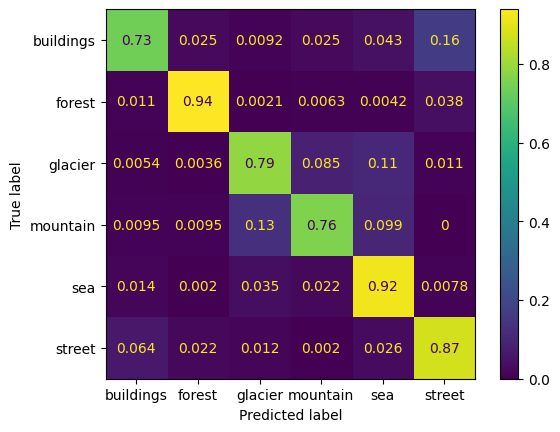

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels, normalize="true")

*El modelo completo ha mejorado en las que era peor el anterior pero a costa de empeorar en edificios y calles que ahora se confunden no solo entre ellos sino que un poco con todos.*

*El modelo fine-tuneado mejora en casi todo al modelo inicial, salvo en la detección de street y ligeramente en las montañas*

### EXTRA

*Vamos a repetir la parte de trasnfer learning pero utilizando aumentado de imágenes a ver si mejoramos algo más*

In [44]:
ficheros = []
clases = []
for directorio in os.listdir(TRAIN_PATH):
    clase = directorio
    ficher = [TRAIN_PATH + directorio + "/" + fichero for fichero in os.listdir(TRAIN_PATH + directorio)]
    clases += [clase for fichero in ficher]
    ficheros += ficher
train_augmented = pd.DataFrame({"filename": ficheros,"category": clases})
train_augmented.head(10)

,filename,category
0,./data/seg_train/glacier/12478.jpg,glacier
1,./data/seg_train/glacier/18420.jpg,glacier
2,./data/seg_train/glacier/16942.jpg,glacier
3,./data/seg_train/glacier/12035.jpg,glacier
4,./data/seg_train/glacier/5539.jpg,glacier
5,./data/seg_train/glacier/7645.jpg,glacier
6,./data/seg_train/glacier/6377.jpg,glacier
7,./data/seg_train/glacier/12873.jpg,glacier
8,./data/seg_train/glacier/14409.jpg,glacier
9,./data/seg_train/glacier/2479.jpg,glacier


In [45]:
def prep_fn(img):
    img = img.astype(np.float32) / 255.0
    img = (img - 0.5) * 2
    return img

 # Para escalar entre -1 y 1, como necesita esta red

In [ ]:
# generador de imágenes
# ángulo de rotación 15
# reescalado 1
# inclinar imágenes "cursivas" 0.1
# zoom 0.2
# giro horizontal True
# desplazamiento horizontal de píxeles 0.1
# desplazamiento vertical de píxeles 0.1

# xxx

In [47]:
train_df, validate_df = train_test_split(train_augmented,
                                         test_size=0.20,stratify=train_augmented["category"],
                                         random_state=42)

In [48]:
train_df.head(10)

,filename,category
8207,./data/seg_train/buildings/14847.jpg,buildings
11215,./data/seg_train/sea/17672.jpg,sea
750,./data/seg_train/glacier/4210.jpg,glacier
916,./data/seg_train/glacier/8039.jpg,glacier
11834,./data/seg_train/forest/15310.jpg,forest
7012,./data/seg_train/street/9188.jpg,street
3694,./data/seg_train/mountain/17344.jpg,mountain
3979,./data/seg_train/mountain/13731.jpg,mountain
9879,./data/seg_train/sea/14635.jpg,sea
1784,./data/seg_train/glacier/13919.jpg,glacier


In [49]:
validate_df.head()

,filename,category
12959,./data/seg_train/forest/3141.jpg,forest
1828,./data/seg_train/glacier/6939.jpg,glacier
4200,./data/seg_train/mountain/6471.jpg,mountain
7677,./data/seg_train/buildings/5313.jpg,buildings
9249,./data/seg_train/buildings/13371.jpg,buildings


In [50]:
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

In [51]:
batch_size = 128

In [ ]:
# definimos el train_generator

# xxx

Found 11227 validated image filenames belonging to 6 classes.


In [ ]:
# definimos el validation_generator, ¡cuidado con el preprocesado!

# xxx

Found 2807 validated image filenames belonging to 6 classes.


In [54]:
earlyS = keras.callbacks.EarlyStopping(patience= 10, restore_best_weights= True)

In [ ]:
from keras.applications import InceptionV3

base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))


for layer in base_model.layers:
    layer.trainable = False




In [ ]:
def prepare_model(base_model = base_model): 
    x = keras.layers.Flatten()(base_model.output)

    x = keras.layers.Dense(2048, activation='relu')(x)
    x = keras.layers.Dropout(rate = 0.25)(x)


    x = keras.layers.Dense(6, activation='softmax')(x)

    model = keras.Model(base_model.input, x)
  
    model.compile(optimizer ="Adam" , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
    return model

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.5483 - loss: 1.5074 - val_accuracy: 0.7446 - val_loss: 0.6923
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.7461 - loss: 0.6947 - val_accuracy: 0.7602 - val_loss: 0.6402
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.7574 - loss: 0.6483 - val_accuracy: 0.7663 - val_loss: 0.6195
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.7711 - loss: 0.6176 - val_accuracy: 0.7727 - val_loss: 0.6049
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.7704 - loss: 0.5933 - val_accuracy: 0.7848 - val_loss: 0.5790
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.7843 - loss: 0.5868 - val_accuracy: 0.7887 - val_loss: 0.5675
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.7900 - loss: 0.5610 - val_accuracy: 0.7823 - val_loss: 0.5800
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.7908 - loss: 0.5553 - val_accuracy: 0.

In [57]:
map_categories_generator = train_generator.class_indices

In [58]:
map_categories_generator

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [60]:
model.evaluate(X_test, y_test_num_generator)

94/94 ━━━━━━━━━━━━━━━━━━━━ 32s 302ms/step - accuracy: 0.7407 - loss: 0.6928


[0.5261992812156677, 0.8023333549499512]

In [61]:
y_pred = [ np.argmax(prediction) for prediction in model.predict(X_test)]

94/94 ━━━━━━━━━━━━━━━━━━━━ 34s 338ms/step


In [62]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
inverse_map_generator = {valor:clave for clave,valor in map_categories_generator.items()}
y_test_labels = [inverse_map_generator[y] for y in y_test_num_generator]
y_pred_labels = [inverse_map_generator[y] for y in y_pred]
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

   buildings       0.85      0.77      0.81       437
      forest       0.95      0.93      0.94       474
     glacier       0.79      0.67      0.73       553
    mountain       0.69      0.77      0.72       525
         sea       0.78      0.80      0.79       510
      street       0.80      0.89      0.84       501

    accuracy                           0.80      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.81      0.80      0.80      3000



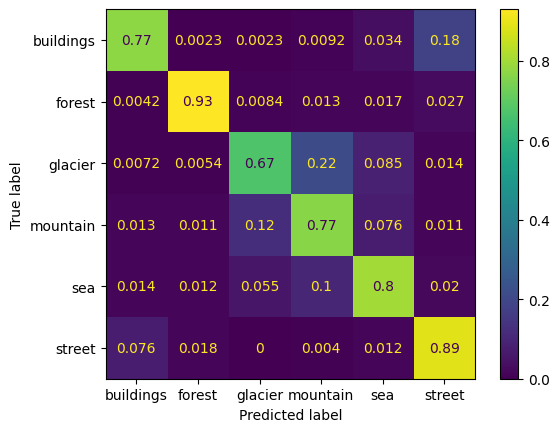

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred_labels, normalize="true")